<a href="https://colab.research.google.com/github/Kunyarat4803/big-data/blob/main/Practice_1_Get_to_Know_Your_Data_653020567_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing
### Data Preprocessing, Data Visualization, Data Analysis



ชื่อ: 653020567-7 กัลยรัตน์ อินทร์สำราญ

กำหนดส่ง: อาทิตย์ 8 กันยายน 2567 (NO EXTENSION!)

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลเบื้องต้นด้วยการสร้าง Data Visualization และ Pivot Tables

**สิ่งที่ต้องมีในการทำงานนี้**
* มีการติดตั้ง Python ในเครื่องคอมพิวเตอร์

**Python libraries ที่ใช้ในงานนี้:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

** NOTE **
* อย่าลืมบันทึกงานที่ทำในโน้ตบุ๊คนี้เป็นประจำขณะทำงาน มิเช่นนั้นงานที่ทำอยู่อาจสูญหายได้
* **เริ่มทำแต่เนิ่น ๆ อย่ารอที่จะทำก่อนส่ง เพราะจะทำไม่เสร็จ เนื่องจากปัญหามากมายที่จะเกิดขึ้นระหว่างการทำงาน และอาจารย์ไม่รับปรึกษาในคืนก่อนส่ง**
----------------------

In [68]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Titanic Data Set
* (10 points) ข้อมูล Titanic เป็นหนึ่งในชุดข้อมูลที่ได้รับความนิยมมากที่สุดในแวดวงการเรียนรู้การวิเคราะห์ข้อมูลและการสร้างโมเดลทางสถิติหรือการเรียนรู้ของเครื่อง (Machine Learning) ชุดข้อมูลนี้มาจากเหตุการณ์เรือ Titanic ซึ่งเป็นเรือสำราญที่ใหญ่ที่สุดในยุคนั้น และเกิดอับปางในปี 1912 ทำให้มีผู้เสียชีวิตจำนวนมาก
    ข้อมูลนี้ประกอบด้วยรายละเอียดของผู้โดยสารบนเรือ Titanic เช่น อายุ เพศ ชั้นที่นั่ง (Pclass) ค่าโดยสาร (Fare) จำนวนญาติพี่น้องหรือคู่สมรสบนเรือ (SibSp) และสถานที่ขึ้นเรือ (Embarked) โดยมีเป้าหมายหลักในการวิเคราะห์หรือการสร้างโมเดลคือการทำนายว่าผู้โดยสารคนนั้นจะรอดชีวิต (Survived) หรือไม่จากการอับปางของเรือ Titanic \
    https://www.kaggle.com/datasets/vinicius150987/titanic3/data

<center><img src="https://www.pigeonforgetncabins.com/wp-content/uploads/2015/06/experience-at-titanic-pigeon-forge.jpg" alt="titanic" width="400"/></center>


In [114]:
import pandas as pd

# Use read_excel to read .xls files
titanic3_df = pd.read_excel('/content/titanic3.xls')

print(titanic3_df.shape)
titanic3_df.head()

(1309, 14)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


* (10 points) จากข้อมูลที่ให้มา มีค่าว่างสูญหายมากน้อยแค่ไหน? และมีค่าผิดปกติ (outliers) และหรือข้อมูลรบกวน (noisy data) หรือไม่ในแต่ละตัวแปร?

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


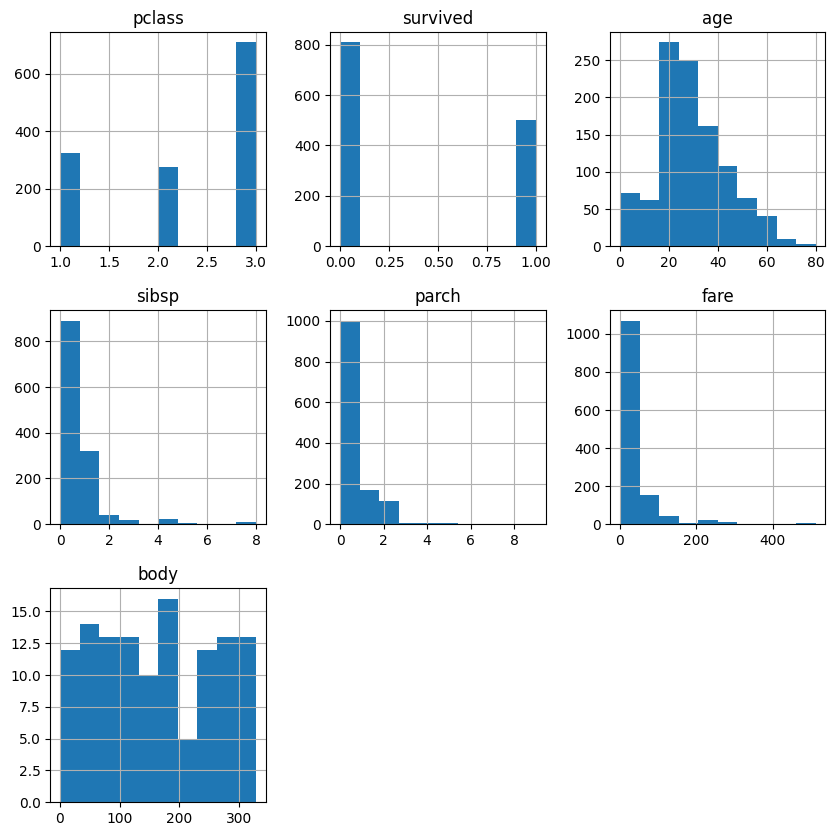

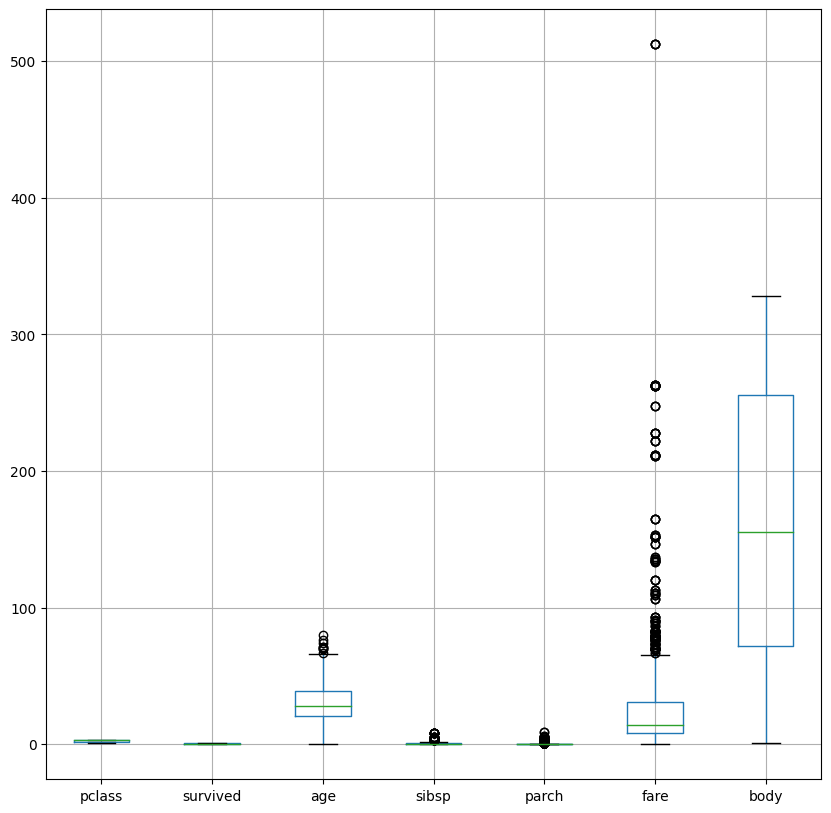

In [98]:
# prompt:  จากข้อมูลที่ให้มา มีค่าว่างสูญหายมากน้อยแค่ไหน? และมีค่าผิดปกติ (outliers) และหรือข้อมูลรบกวน (noisy data) หรือไม่ในแต่ละตัวแปร?

import matplotlib.pyplot as plt
# Check for missing values
print(titanic3_df.isnull().sum())

# Analyze the distribution of data to identify outliers
titanic3_df.describe()

# Visualize data to identify outliers
titanic3_df.hist(figsize=(10, 10))
plt.show()

# You can also use box plots to visualize outliers
titanic3_df.boxplot(figsize=(10, 10))
plt.show()


* (10 points) จากข้อมูลที่ให้มา เตรียมข้อมูลให้พร้อมโดยการจัดการกับค่าว่างในข้อมูล ให้อธิบายวิธีที่ท่านเลือกใช้ พร้อมยกเหตุผลประกอบ

In [121]:
# เติมค่าว่างในคอลัมน์ age ด้วยค่าเฉลี่ย
titanic3_df['age'].fillna(titanic3_df['age'].mean(), inplace=True)
# เติมค่าว่างในคอลัมน์ fare ด้วยค่าเฉลี่ย
titanic3_df['fare'].fillna(titanic3_df['fare'].mean(), inplace=True)
# เติมค่าว่างในคอลัมน์ cabin ด้วยค่าคงที่
titanic3_df['cabin'].fillna('Unknown', inplace=True)
# เติมค่าว่างในคอลัมน์ embarked ด้วยค่าเหมือน
titanic3_df['embarked'].fillna(titanic3_df['embarked'].mode()[0], inplace=True)
# เติมค่าว่างในคอลัมน์ boat ด้วยค่าคงที่
titanic3_df['boat'].fillna('Unknown', inplace=True)
# เติมค่าว่างในคอลัมน์ body ด้วยค่าคงที่
titanic3_df['body'].fillna('Unknown', inplace=True)
# เติมค่าว่างในคอลัมน์ home.dest ด้วยค่าคงที่
titanic3_df['home.dest'].fillna('Unknown', inplace=True)
print(titanic3_df.isnull().sum())
titanic3_df





pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,Unknown,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,Unknown,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,Unknown,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,Unknown,Unknown,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,Unknown,C,Unknown,328.0,Unknown
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,Unknown,C,Unknown,Unknown,Unknown
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,Unknown,C,Unknown,304.0,Unknown
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,Unknown,C,Unknown,Unknown,Unknown


* แปลงข้อมูลเชิงคุณภาพให้เป็นตัวเลข \
    i. (10 points) ใช้ one-hot encoding ในการแปลงตัวแปร Embarked \
    ii. (10 points) แปลงตัวแปร Sex โดยให้เพศชายเป็น 0 และเพศหญิงเป็น 1 \
    iii. (10 points) สร้างตัวแปร FamilySize ซึ่งเป็นผลรวมของตัวแปร SibSp (number of siblings/spouses aboard) และ Parch (number of parents/children aboard) \
    iv. (10 points) สร้างตัวแปร IsAlone ซึ่งมีค่าเป็น 1 ถ้า FamilySize เป็น 0, และมีค่าเป็นศูนย์เมื่อเป็นอื่น

In [101]:
import pandas as pd
import numpy as np

# อ่านข้อมูล Titanic
titanic3_df = pd.read_excel('/content/titanic3.xls')
# i. One-hot encoding for 'Embarked'
titanic3_df = pd.get_dummies(titanic3_df, columns=['embarked'], prefix='embarked', drop_first=True)

# ii. แปลง 'Sex' column: Male = 0, Female = 1
titanic3_df['sex'] = titanic3_df['sex'].map({'male': 0, 'female': 1})

# iii. สร้างตัวแปร 'FamilySize' จาก 'SibSp' และ 'Parch'
titanic3_df['FamilySize'] = titanic3_df['sibsp'] + titanic3_df['parch']

# iv. สร้างตัวแปร 'IsAlone': 1 ถ้า FamilySize = 0, 0 ถ้าไม่ใช่
titanic3_df['IsAlone'] = np.where(titanic3_df['FamilySize'] == 0, 1, 0)



In [102]:
titanic3_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,embarked_Q,embarked_S,FamilySize,IsAlone
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,2,NaN,"St Louis, MO",False,True,0,1
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,11,NaN,"Montreal, PQ / Chesterville, ON",False,True,3,0
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",False,True,3,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,NaN,135.0,"Montreal, PQ / Chesterville, ON",False,True,3,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,NaN,NaN,"Montreal, PQ / Chesterville, ON",False,True,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,NaN,328.0,NaN,False,False,1,0
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,NaN,NaN,NaN,False,False,1,0
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,NaN,304.0,NaN,False,False,0,1
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,NaN,NaN,NaN,False,False,0,1


* ทำการ Normalize ข้อมูล \
    i. (10 points) ตัวแปร Fare และ Age ใช้ Min-Max Scaling \
    ii. (10 points) สร้างตัวแปรใหม่ Fare_Per_Person ด้วยการนำตัวแปร Fare มาหารด้วย FamilySize + 1 \
    iii. (10 points) สร้างตัวแปร AgeGroup ที่ระบุกลุ่มอายุของตัวอย่าง โดยแบ่งเป็นกลุ่มดังนี้ [0, 12), [12, 18), [18, 50) และ [50, 100)

In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# อ่านข้อมูล Titanic
titanic3_df = pd.read_excel('/content/titanic3.xls')

# ตรวจสอบและเติมค่าว่างในตัวแปร 'Fare' และ 'Age'
titanic3_df[['fare', 'age']] = titanic3_df[['fare', 'age']].fillna(titanic3_df[['fare', 'age']].mean())

# i. ทำ Min-Max Scaling สำหรับตัวแปร Fare และ Age
scaler = MinMaxScaler()
# Removed the extra tab from 'fare\t'
titanic3_df[['fare', 'age']] = scaler.fit_transform(titanic3_df[['fare', 'age']])

# ii. สร้างตัวแปร FamilySize และ Fare_Per_Person
titanic3_df['FamilySize'] = titanic3_df['sibsp'] + titanic3_df['parch']
titanic3_df['Fare_Per_Person'] = titanic3_df['fare'] / (titanic3_df['FamilySize'] + 1)

# iii. สร้างตัวแปร AgeGroup แบ่งตามช่วงอายุ [0, 12), [12, 18), [18, 50), [50, 100)
bins = [0, 12, 18, 50, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
titanic3_df['AgeGroup'] = pd.cut(titanic3_df['age'], bins=bins, labels=labels, right=False)

# ตรวจสอบผลลัพธ์
print(titanic3_df[['fare', 'age', 'Fare_Per_Person', 'AgeGroup']].head())

       fare       age  Fare_Per_Person AgeGroup
0  0.412503  0.361169         0.412503    Child
1  0.295806  0.009395         0.073951    Child
2  0.295806  0.022964         0.073951    Child
3  0.295806  0.373695         0.073951    Child
4  0.295806  0.311064         0.073951    Child


In [104]:
titanic3_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,FamilySize,Fare_Per_Person,AgeGroup
0,1,1,"Allen, Miss. Elisabeth Walton",female,0.361169,0,0,24160,0.412503,B5,S,2,NaN,"St Louis, MO",0,0.412503,Child
1,1,1,"Allison, Master. Hudson Trevor",male,0.009395,1,2,113781,0.295806,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,0.073951,Child
2,1,0,"Allison, Miss. Helen Loraine",female,0.022964,1,2,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0.073951,Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,0.373695,1,2,113781,0.295806,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,0.073951,Child
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,0.311064,1,2,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0.073951,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,0.179540,1,0,2665,0.028213,NaN,C,NaN,328.0,NaN,1,0.014106,Child
1305,3,0,"Zabour, Miss. Thamine",female,0.372206,1,0,2665,0.028213,NaN,C,NaN,NaN,NaN,1,0.014106,Child
1306,3,0,"Zakarian, Mr. Mapriededer",male,0.329854,0,0,2656,0.014102,NaN,C,NaN,304.0,NaN,0,0.014102,Child
1307,3,0,"Zakarian, Mr. Ortin",male,0.336117,0,0,2670,0.014102,NaN,C,NaN,NaN,NaN,0,0.014102,Child


In [105]:
import pandas as pd
import numpy as np
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [106]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), [0,2,5,8])

[(0, 2], (5, 8], (2, 5], (2, 5], (5, 8], (2, 5]]
Categories (3, interval[int64, right]): [(0, 2] < (2, 5] < (5, 8]]

* (10 points) นำเสนอการแจกแจงหรือทำความเข้าใจตัวแปรสำคัญในข้อมูล เช่น Age, Fare, and Pclass ด้วยการสร้างฮิสโตแกรมหรือแผนภาพกล่อง

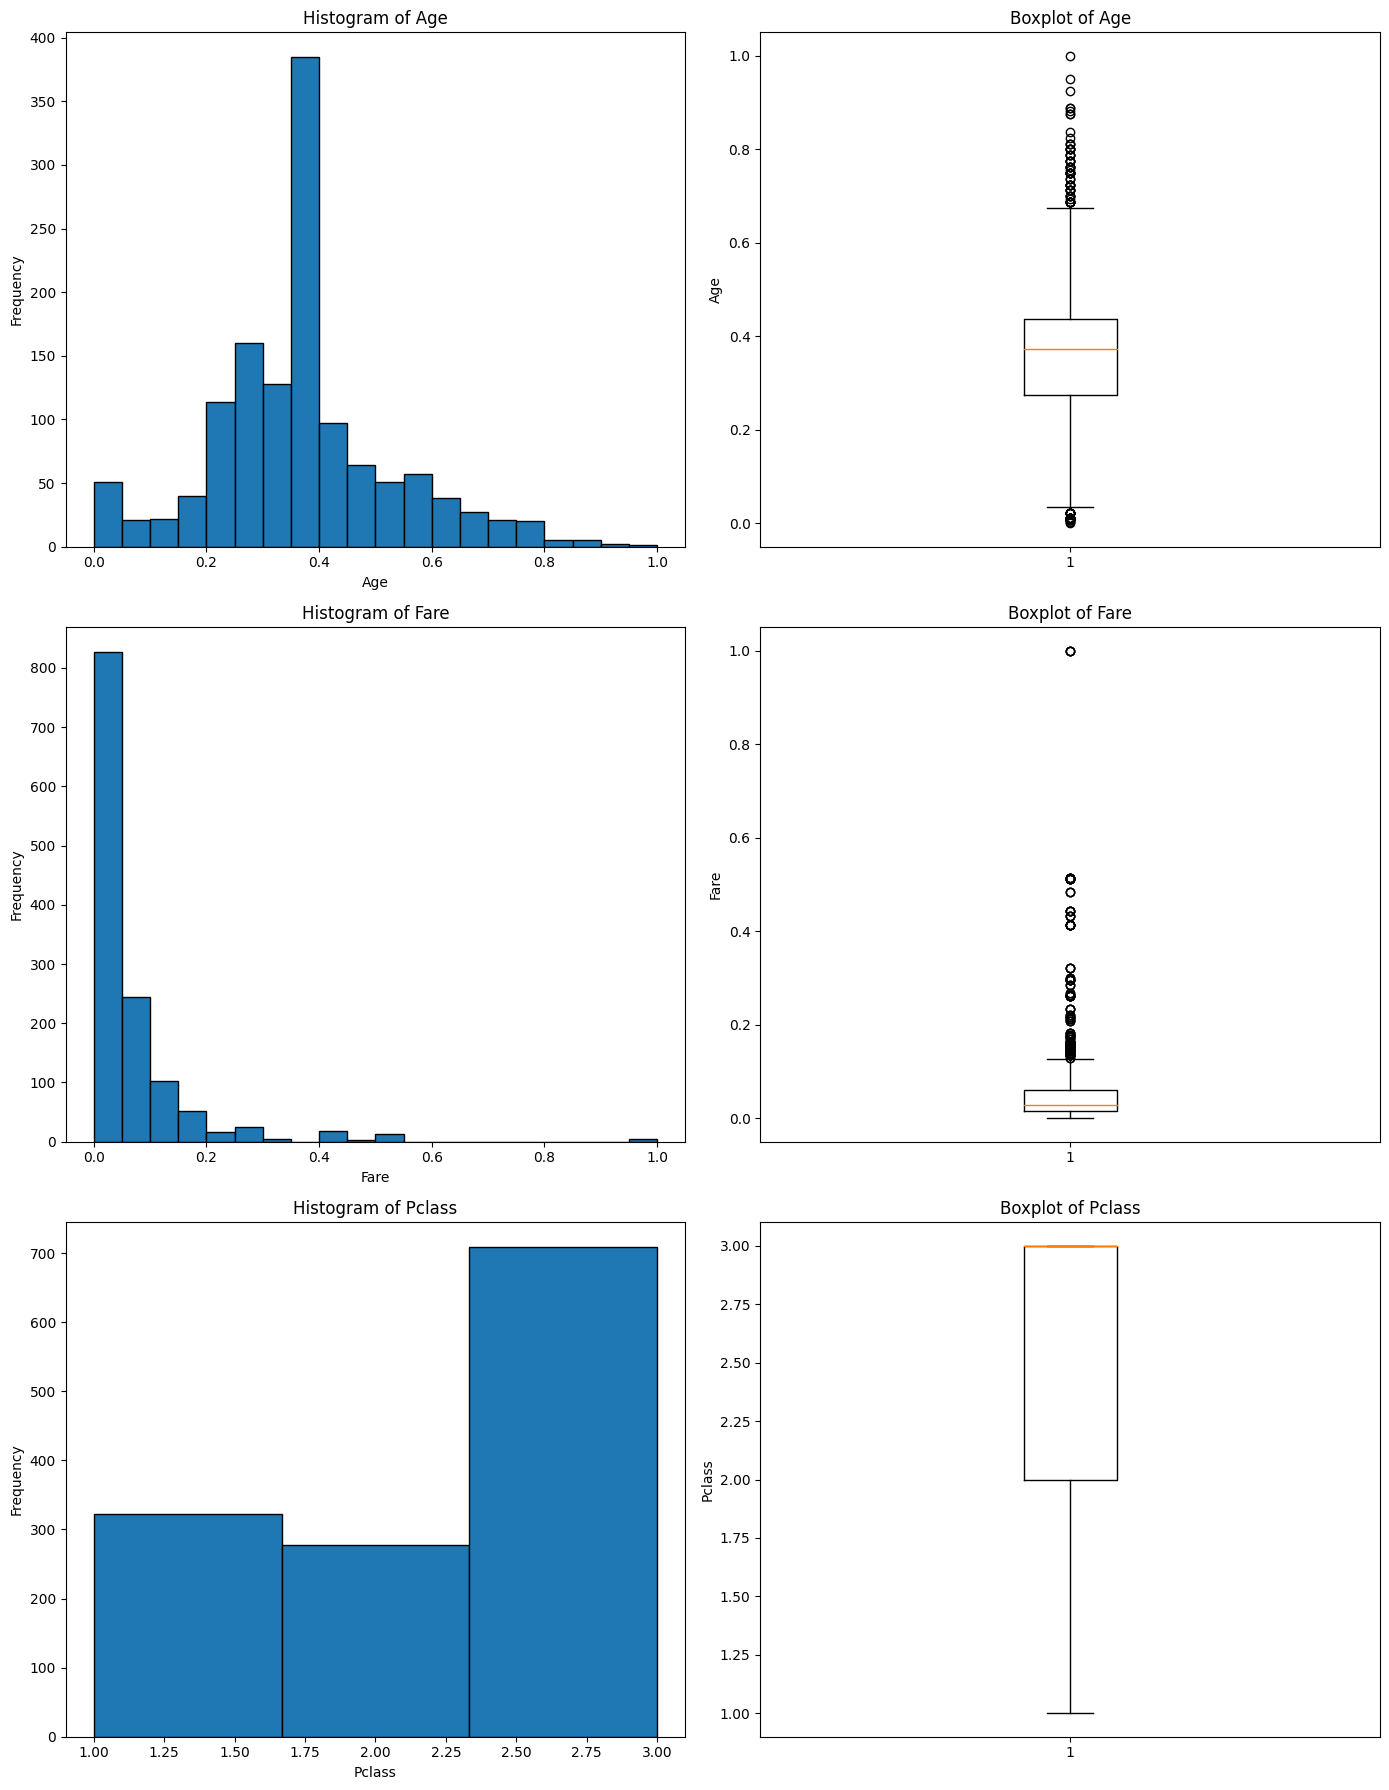

In [107]:
# ตรวจสอบค่าว่างและเติมค่าว่างที่จำเป็น
titanic3_df[['age', 'fare']] = titanic3_df[['age', 'fare']].fillna(titanic3_df[['age', 'fare']].mean()) # Use the correct column names: 'age' and 'fare'

# สร้างฮิสโตแกรมและแผนภาพกล่องสำหรับ Age, Fare, และ Pclass
fig, axs = plt.subplots(3, 2, figsize=(14, 18))

# ฮิสโตแกรมสำหรับ Age
axs[0, 0].hist(titanic3_df['age'], bins=20, edgecolor='black')
axs[0, 0].set_title('Histogram of Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# แผนภาพกล่องสำหรับ Age
axs[0, 1].boxplot(titanic3_df['age'].dropna())
axs[0, 1].set_title('Boxplot of Age')
axs[0, 1].set_ylabel('Age')

# ฮิสโตแกรมสำหรับ Fare
axs[1, 0].hist(titanic3_df['fare'], bins=20, edgecolor='black') # Use the correct column name: 'fare'
axs[1, 0].set_title('Histogram of Fare')
axs[1, 0].set_xlabel('Fare')
axs[1, 0].set_ylabel('Frequency')

# แผนภาพกล่องสำหรับ Fare
axs[1, 1].boxplot(titanic3_df['fare'].dropna()) # Use the correct column name: 'fare'
axs[1, 1].set_title('Boxplot of Fare')
axs[1, 1].set_ylabel('Fare')

# ฮิสโตแกรมสำหรับ Pclass
axs[2, 0].hist(titanic3_df['pclass'].dropna(), bins=3, edgecolor='black')
axs[2, 0].set_title('Histogram of Pclass')
axs[2, 0].set_xlabel('Pclass')
axs[2, 0].set_ylabel('Frequency')

# แผนภาพกล่องสำหรับ Pclass
axs[2, 1].boxplot(titanic3_df['pclass'].dropna())
axs[2, 1].set_title('Boxplot of Pclass')
axs[2, 1].set_ylabel('Pclass')

plt.tight_layout()
plt.show()

* เมื่อเตรียมข้อมูลพร้อมแล้ว ให้หาความสัมพันธ์ของตัวแปรต่อไปนี้จากข้อมูล ซึ่งอาจนำเสนอด้วยสถิติและแผนภูมิหรือกราฟก็ได้: \
    i. (10 points) survived และ pclass \
    ii. (10 points) survived และ sex \
    iii. (10 points) survived และ age \
    iv. (10 points) จำนวนสมาชิกครอบครัวที่รอดชีวิต และ Fare

i.ความสัมพันธ์ระหว่าง ข้อความตัวเอียง survived และ pclass

Survival Rate by Pclass:
pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64


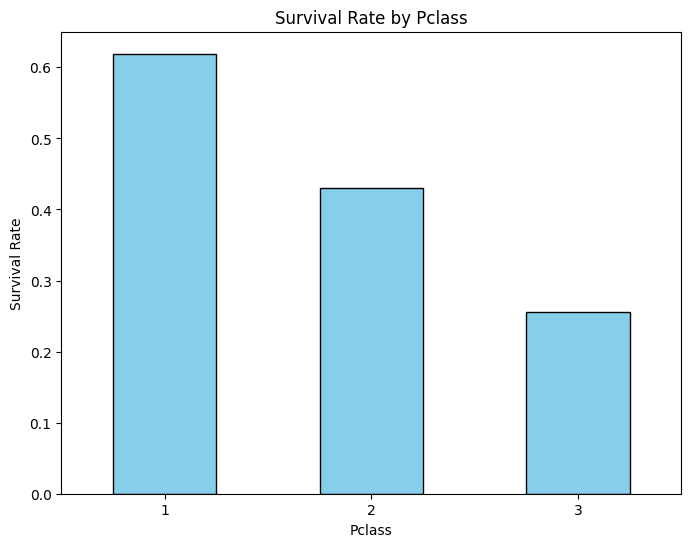

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# อ่านข้อมูล Titanic
titanic3_df = pd.read_excel('/content/titanic3.xls')

# ตรวจสอบชื่อคอลัมน์และการแก้ไข
titanic3_df = titanic3_df.rename(columns={'age': 'Age', 'fare': 'Fare'})

# คำนวณอัตราการรอดชีวิตสำหรับแต่ละ Pclass
survival_rate_by_pclass = titanic3_df.groupby('pclass')['survived'].mean()

# แสดงผลลัพธ์
print("Survival Rate by Pclass:")
print(survival_rate_by_pclass)

# แสดงแผนภูมิแท่ง
plt.figure(figsize=(8, 6))
survival_rate_by_pclass.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


ii. ความสัมพันธ์ระหว่าง survived และ sex

Survival Rate by Sex:
sex
female    0.727468
male      0.190985
Name: survived, dtype: float64


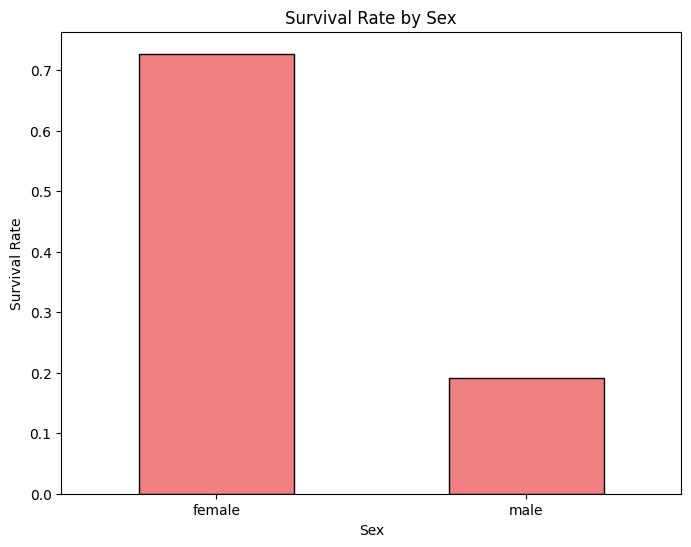

In [109]:
# คำนวณอัตราการรอดชีวิตตามเพศ
survival_rate_by_sex = titanic3_df.groupby('sex')['survived'].mean()

# แสดงผลลัพธ์
print("Survival Rate by Sex:")
print(survival_rate_by_sex)

# แสดงแผนภูมิแท่ง
plt.figure(figsize=(8, 6))
survival_rate_by_sex.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


iii. ความสัมพันธ์ระหว่าง survived และ age

Correlation between Age and Survival: -0.06


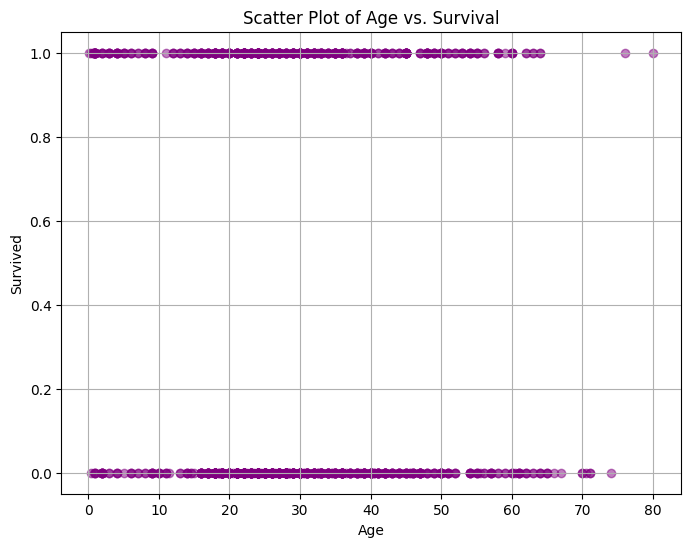

In [110]:
# คำนวณค่าสหสัมพันธ์
correlation_age_survived = titanic3_df[['Age', 'survived']].corr().loc['Age', 'survived']
print(f"Correlation between Age and Survival: {correlation_age_survived:.2f}")

# แสดงกราฟกระจาย
plt.figure(figsize=(8, 6))
plt.scatter(titanic3_df['Age'], titanic3_df['survived'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Age vs. Survival')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.grid(True)
plt.show()


iv. ความสัมพันธ์ระหว่างจำนวนสมาชิกครอบครัวที่รอดชีวิต (FamilySize) และ Fare

Correlation between FamilySize and Fare: 0.23


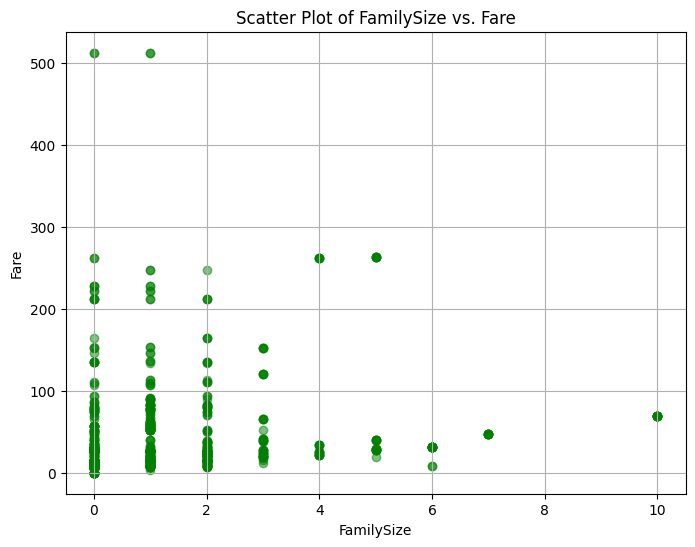

In [92]:
# สร้างตัวแปร FamilySize
titanic3_df['FamilySize'] = titanic3_df['sibsp'] + titanic3_df['parch']

# คำนวณค่าสหสัมพันธ์
correlation_family_fare = titanic3_df[['FamilySize', 'Fare']].corr().loc['FamilySize', 'Fare']
print(f"Correlation between FamilySize and Fare: {correlation_family_fare:.2f}")

# แสดงกราฟกระจาย
plt.figure(figsize=(8, 6))
plt.scatter(titanic3_df['FamilySize'], titanic3_df['Fare'], alpha=0.5, color='green')
plt.title('Scatter Plot of FamilySize vs. Fare')
plt.xlabel('FamilySize')
plt.ylabel('Fare')
plt.grid(True)
plt.show()


* (10 points) สร้างตารางสรุปข้อมูลเพื่อหาคุณลักษณะของผู้โดยสารเรือไททานิค และศึกษาเกี่ยวกับการเสียชีวิตของผู้โดยสาร ทำการสรุปผลที่ได้จากตาราง

In [111]:
# prompt: สร้างตารางสรุปข้อมูลเพื่อหาคุณลักษณะของผู้โดยสารเรือไททานิค และศึกษาเกี่ยวกับการเสียชีวิตของผู้โดยสาร ทำการสรุปผลที่ได้จากตาราง

import pandas as pd
# อ่านข้อมูล Titanic
titanic3_df = pd.read_excel('/content/titanic3.xls')

# ตรวจสอบชื่อคอลัมน์และแก้ไขหากจำเป็น
titanic3_df = titanic3_df.rename(columns={'age': 'Age', 'fare': 'Fare'})

# เติมค่าว่างที่จำเป็น
titanic3_df[['Age', 'Fare']] = titanic3_df[['Age', 'Fare']].fillna(titanic3_df[['Age', 'Fare']].mean())

# สร้างตัวแปร FamilySize
titanic3_df['FamilySize'] = titanic3_df['sibsp'] + titanic3_df['parch']

# สร้างตารางสรุปข้อมูล
summary_df = titanic3_df.groupby('survived').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Fare': ['mean', 'std', 'min', 'max'],
    'pclass': ['mean', 'std', 'min', 'max'],
    'FamilySize': ['mean', 'std', 'min', 'max']
}).reset_index()

summary_df


survived        Age                                Fare                  \
                 mean        std     min   max       mean        std  min   
0        0  30.389368  12.179325  0.3333  74.0  23.366119  34.125750  0.0   
1        1  29.058812  13.920411  0.1667  80.0  49.361184  68.648795  0.0   

               pclass                   FamilySize                    
        max      mean       std min max       mean       std min max  
0  263.0000  2.500618  0.744825   1   3   0.850433  1.792760   0  10  
1  512.3292  1.962000  0.872972   1   3   0.938000  1.168283   0   6